<h1><center>ROOFIT</center></h1>
<h2><center>ROOT's Library for Modelling and Fitting</center></h2>
<h2><center>PART 1</center></h2>

RooFit is essentially a library of toolkits for modelling. Some analysis requires the event distribution to be modelled, performing unbinned maximum likelihood fits or even to generate toy Monte Carlo samples. 

RooFit works a bit different from the standard ROOT TF1 fits. Let's go through it one by one.



In [2]:
import ROOT

Welcome to JupyROOT 6.22/00


# Basic Functionalities

## Build a Model

First off, let's see how you would build a model. You need models in order to generate MC or to fit to a dataset.

RooFit's main concept is that models are object-oriented, where each class corresponds to a mathematical object. This is not to say RooFit is independent of the standard ROOT library, it in facts delegates to the standard library where possible as you will see later on. For example:

|Math Concept|<div style="width:150px">Math Symbol</div>|<div style="width:100px">RooFit Class</div>|
|:-------|:----------:|:-----|
|Variable|$x$|RooRealVar|
|Function|$f(x)$|RooAbsReal|
|PDF|$F(x;p)$|RooAbsPdf|
|Integral|$\int_{x_1}^{x_2} f(x)dx$|RooRealIntegral|
|Space Points|$\overrightarrow{x}$|RooArgSet|
|Addition|$aF(x) + (1-a)F(x)$|RooAddPdf|
|Convolution|$F(x)\circledast G(x)$|RooFFTConvPdf|

    
and so on. The simplest mathematical function utilizes RooFit objects. So, rather than a user-defined function that gives out values of a Gaussian distribution, it is represented by its own class and can consist of multiple objects for each of its parameters.

Let's build a model for a Gaussian distribution using the **RooGaussian** class.


In [3]:
# declare the variable x with range(-10, 10)
x = ROOT.RooRealVar("x", "x", -10, 10)

# declare the mean of the gaussian with initial value x, and floating range(-5, 5)
m = ROOT.RooRealVar("m", "gaussian mean", 3, -5, 5)

# declare the gaussian width
s = ROOT.RooRealVar("s", "gaussian width", 1, 0, 2)

# build the gaussian pdf model
gaus = ROOT.RooGaussian("gaus", "gaussian PDF", x, m, s)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



As you see above, each RooRealVar objects follows the standard ROOT object declaration with its own unique name, a title (not necessarily unique), the range, and an sometimes an initial value (such as in `m` and `s`).

The **RooRealVar** class collects all the basic information of the variables.

With the variables, we then create a Gaussian pdf with **RooGaussian**, that inherits from **RooAbsPdf** that carries the basic attributes of a probaility distribution function.

## RooPlot: Plotting and Visualization

To plot the models are datasets, we will need to use the **RooPlot** class. First, we need to build a 'frame' for the objects to be placed in.

In [4]:
frame = x.frame(ROOT.RooFit.Title("Gaussian PDF"))

Now, with the frame, plot the objects in. The plotting attributes can be accessed in a familiar way to the main ROOT plotting method, as below:

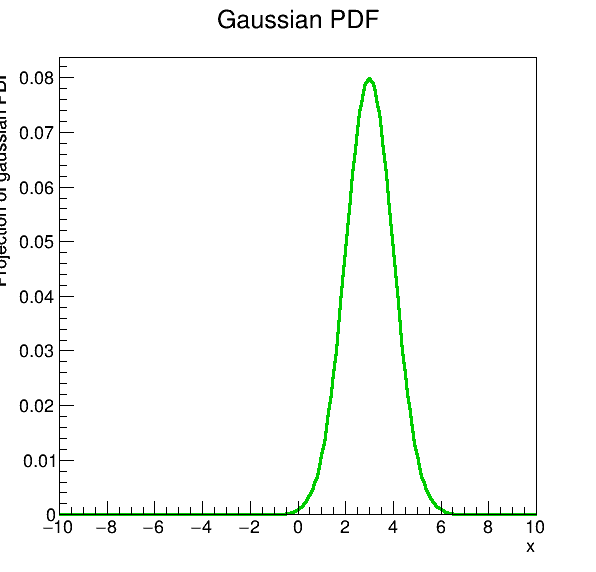

In [5]:
# place the RooFit plotable objects into the RooPlot frame
gaus.plotOn(frame, ROOT.RooFit.LineColor(ROOT.kGreen+1))

c = ROOT.TCanvas("c", "canvas", 600, 600)
frame.Draw()
c.Draw()

## Generate Monte Carlo Events

From the **RooAbsPdf** class, we can generate a dataset of MC events with the **RooDataSet** class.

We will generate 1000 events along the `x` variable:

RooDataSet::gausData[x] = 1000 entries


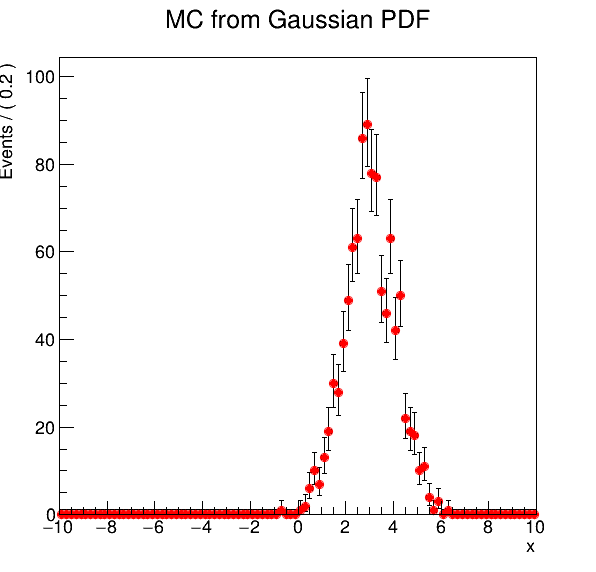

In [6]:
# generate a toy MC dataset sample from the pdf, you need to specify the variable you want to generate events along
data = gaus.generate(x, 1000)
data.Print()

frame2 = x.frame(ROOT.RooFit.Title("MC from Gaussian PDF"))

c.Clear()
data.plotOn(frame2, ROOT.RooFit.MarkerColor(ROOT.kRed))
frame2.Draw()
c.Draw()

## Fitting

The dataset above can then be fitted with the pdf. The result can be saved by placing the activating the flag `Save()` in the fitting options, which will return a **RooFitResult**.

In [7]:
# fit the pdf to the MC dataset silently(without printing the operation), and save the fit result
fitResult = gaus.fitTo(data, ROOT.RooFit.Save(), ROOT.RooFit.PrintLevel(-1))

# if you want to print the final fit result later on
fitResult.Print("v")

# obtain the correlation matrix from the RooFitResult
corMatrix = fitResult.correlationMatrix()
corMatrix.Print()

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization

  RooFitResult: minimized FCN value: 1456.09, estimated distance to minimum: 1.72525e-06
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                     m    3.0000e+00    3.0268e+00 +/-  3.28e-02  <none>
                     s    1.0000e+00    1.0378e+00 +/-  2.32e-02  <none>


2x2 matrix is as follows

     |      0    |      1    |
-------------------------------
   0 |          1   0.0001724 
   1 |  0.0001724           1 



[#1] INFO:Plotting -- RooAbsPdf::plotOn(gaus) only plotting range [-2,8], curve is normalized to data in given range
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'plotRange' created with bounds [-2,8]


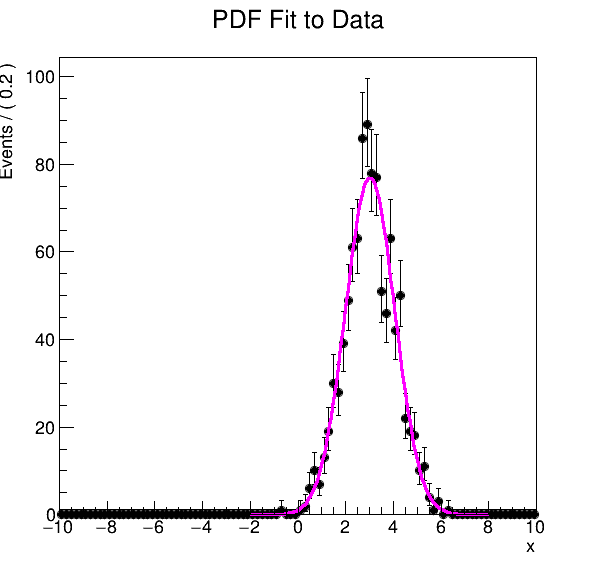

In [8]:
# declare a frame
frame3 = x.frame(ROOT.RooFit.Title("PDF Fit to Data"))

# plot the dataset
data.plotOn(frame3)

# plot the pdf only in range(-2, 8)
gaus.plotOn(frame3, ROOT.RooFit.Range(-2, 8), ROOT.RooFit.LineColor(ROOT.kMagenta))

c.Clear()
frame3.Draw()
c.Draw()

In certain situations, you may want to fit only in certain ranges and not all of it.

In [9]:
m2    = ROOT.RooRealVar("m2", "gaussian mean", 3, -5, 5)
s2    = ROOT.RooRealVar("s2", "gaussian width", 1, 0, 2)
gaus2 = ROOT.RooGaussian("gaus2", "gaussian PDF", x, m, s)

gaus2.fitTo(data, ROOT.RooFit.Range(-2, 4), ROOT.RooFit.PrintLevel(-1))

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit' created with bounds [-2,4]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_gaus2_gausData) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'NormalizationRangeForfit' created with bounds [-10,10]
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit_nll_gaus2_gausData' created with bounds [-2,4]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_gaus2_gausData) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization


[#1] INFO:Plotting -- RooAbsPdf::plotOn(gaus2) p.d.f was fitted in a subrange and no explicit Range() and NormRange() was specified. Plotting / normalising in fit range. To override, do one of the following
	- Clear the automatic fit range attribute: <pdf>.setStringAttribute("fitrange", nullptr);
	- Explicitly specify the plotting range: Range("<rangeName>").
	- Explicitly specify where to compute the normalisation: NormRange("<rangeName>").
	The default (full) range can be denoted with Range("") / NormRange("").
[#1] INFO:Plotting -- RooAbsPdf::plotOn(gaus2) only plotting range 'fit_nll_gaus2_gausData'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(gaus2) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_gaus2_gausData'


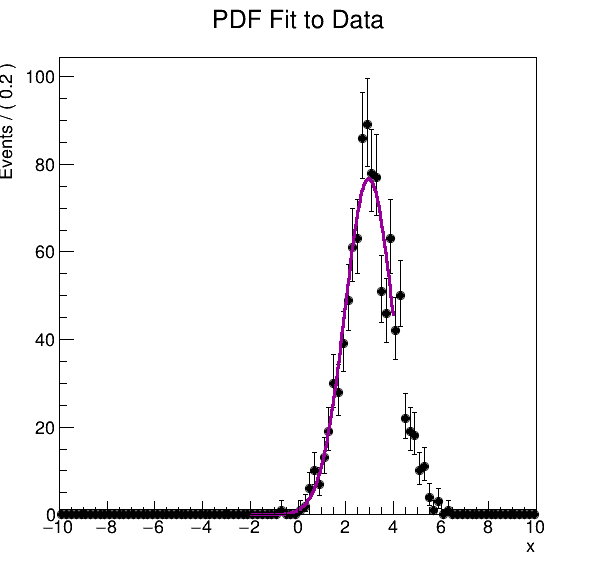

In [10]:
frame4 = x.frame(ROOT.RooFit.Title("PDF Fit to Data"))
data.plotOn(frame4)
gaus2.plotOn(frame4, ROOT.RooFit.LineColor(ROOT.kMagenta+2))
c.Clear()
frame4.Draw()
c.Draw()

## Importing Data

Generally, we do not play with toy MCs only when doing data analysis. We can import the TTrees & histograms from ROOT files into a container. The container is different in a binned data context and unbinned data.

### RooDataHist: Binned Data

Binned data is expressed with the **RooDatHist** class, that takes in a TH1 object. Whatever information of the histogram is then used for the RooDataHist.

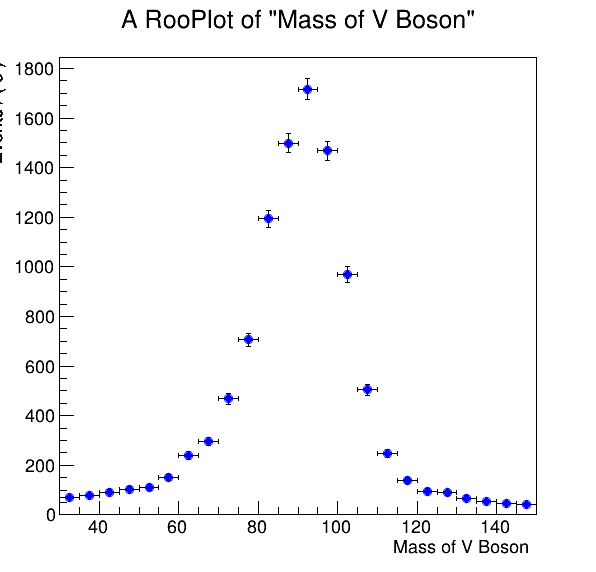

In [11]:
# import a tree
f = ROOT.TFile("./rootfiles/signal.root", "OPEN")
tree = f.Get("mumu")

# plot the events into a histo
histo = ROOT.TH1F("histo", "histo", 40, 0, 200)
tree.Draw("VCand_mass_tag>>histo")

# declare the variable
mass = ROOT.RooRealVar("mass", "Mass of V Boson", 30, 150)

# declare the DataHist with an imported Histogram
dh = ROOT.RooDataHist("dh", "dh", mass, ROOT.RooFit.Import(histo))

massFrame = mass.frame()

c.Clear()
dh.plotOn(massFrame, ROOT.RooFit.MarkerColor(ROOT.kBlue))
massFrame.Draw()
c.Draw()

Let's do one more fit, this time using a Bukin function on the DataHist above.

In [12]:
# pdf mean
m0 = ROOT.RooRealVar("m0", "CB mean", 85, 70, 100)

# pdf width
sig = ROOT.RooRealVar("sig", "CB width", 20, 0, 100)

# pdf asymmetry
xi = ROOT.RooRealVar("xi", "CB core asymmetry", 1, 0, 50)

# pdf tail
rho1 = ROOT.RooRealVar("rho1", "CB rho 1", 1, 0, 10)
rho2 = ROOT.RooRealVar("rho2", "CB rho 2", 1, 0, 10)

# CB pdf
bukin = ROOT.RooBukinPdf("cb", "Crystal Ball pdf", mass, m0, sig, xi, rho1, rho2)

# fitting
bukinFit = bukin.fitTo(dh, ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())

[#0] WARNING:InputArguments -- The parameter 'sig' with range [0, 100] of the RooBukinPdf 'cb' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'rho1' with range [0, 10] of the RooBukinPdf 'cb' exceeds the safe range of (-1, 0). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'rho2' with range [0, 10] of the RooBukinPdf 'cb' exceeds the safe range of (0, 1). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'xi' with range [0, 50] of the RooBukinPdf 'cb' exceeds the safe range of (-1, 1). Advise to limit its range.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(cb_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization


chi square:  3.9328196232205603
[#1] INFO:NumericIntegration -- RooRealIntegral::init(cb_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)


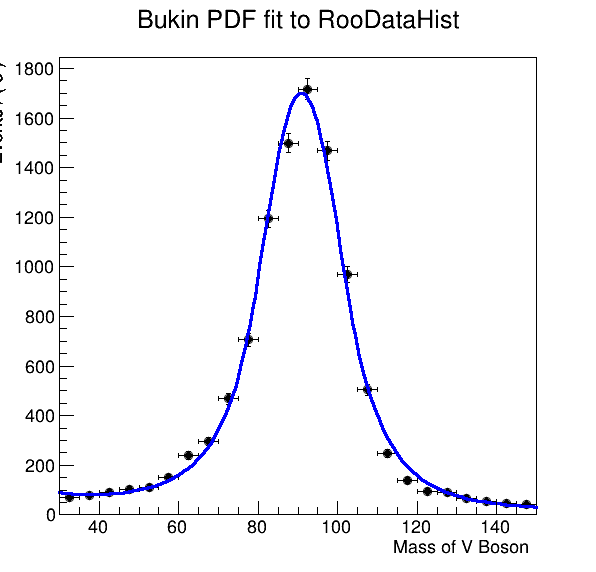

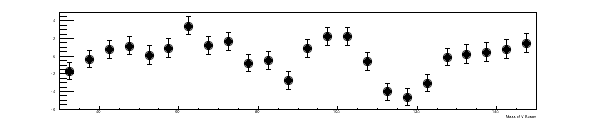

In [13]:
bukinFrame = mass.frame(ROOT.RooFit.Title("Bukin PDF fit to RooDataHist"))

dh.plotOn(bukinFrame)
bukin.plotOn(bukinFrame)

# print out the chi-square value of the fit and the dataset
print("chi square: ", bukinFrame.chiSquare())

c.Clear()
bukinFrame.Draw()
c.Draw()

# construct a histogram with the pulls of the data points wrt to the curve
pc = ROOT.TCanvas("pc", "pull canvas", 600, 150)
pull = bukinFrame.pullHist()
bukinFrame2 = mass.frame(ROOT.RooFit.Title(" "))
bukinFrame2.addPlotable(pull, "P")
bukinFrame2.Draw()
pc.Draw()

### RooDataSet: Unbinned Data

Generally, unbinned datasets can sometimes be more powerful. Prior examples have used the **RooDataSet** class, which is a sort of container for events without bins unlike RooDataHist. Each data point is considered, giving fits to the highest precision. Though, size can be a hindrance when it is too large as the process will take a much longer time.

Let's see the previously generated MC dataset:

In [14]:
data.Print("V")

DataStore gausData (Generated From gaussian PDF)
  Contains 1000 entries
  Observables: 
    1)  x = 3.82924  L(-10 - 10)  "x"


The RooDataSet contains 1000 events generated from a custom gaussian pdf on the variable x plane. We can import our own events from TTrees (and correspondingly, TChains).

In [15]:
# declare variables
vmass = ROOT.RooRealVar("VCand_mass_tag", "Mass of V boson", 10, 200)
zmass = ROOT.RooRealVar("ZCand_mass", "Mass of Z Boson", 10, 200)

# set binning of the variables, divide the range by the bin width
vbins = int((vmass.getMax() - vmass.getMin()) / 10)
zbins = int((zmass.getMax() - zmass.getMin()) / 10)

vmass.setBins(vbins)
zmass.setBins(zbins)

# declare a container to hold some variables
arg = ROOT.RooArgSet(vmass, zmass)

ds = ROOT.RooDataSet("ds", "dataset", arg, ROOT.RooFit.Import(tree))
ds.Print("v")

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(VCand_mass_tag) TTree Float_t branch VCand_mass_tag will be converted to double precision.
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(ZCand_mass) TTree Float_t branch ZCand_mass will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(ds) Skipping event #108 because VCand_mass_tag cannot accommodate the value 210.564
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(ds) Skipping event #272 because VCand_mass_tag cannot accommodate the value 200.158
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(ds) Skipping event #418 because VCand_mass_tag cannot accommodate the value 209.853
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(ds) Skipping event #545 because VCand_mass_tag cannot accommodate the value 208.278
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(ds) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(ds) Ignored 109 out-of-range events
Da

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


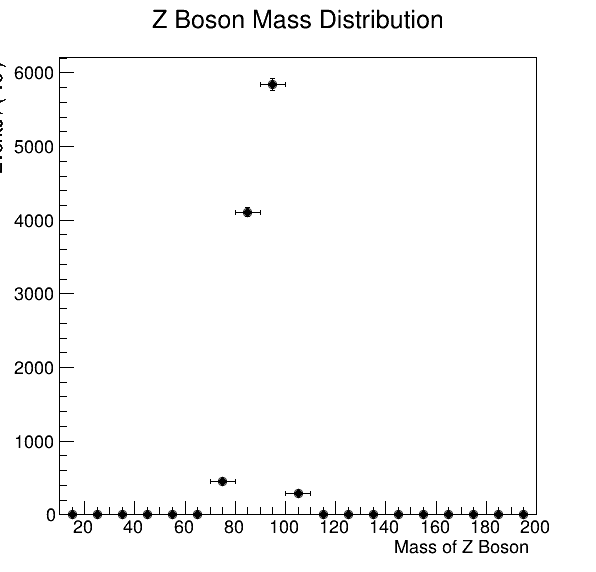

In [16]:
zframe = zmass.frame(ROOT.RooFit.Title("Z Boson Mass Distribution"))

ds.plotOn(zframe)

c = ROOT.TCanvas("c", "canv", 600, 600)
zframe.Draw()
c.Draw()

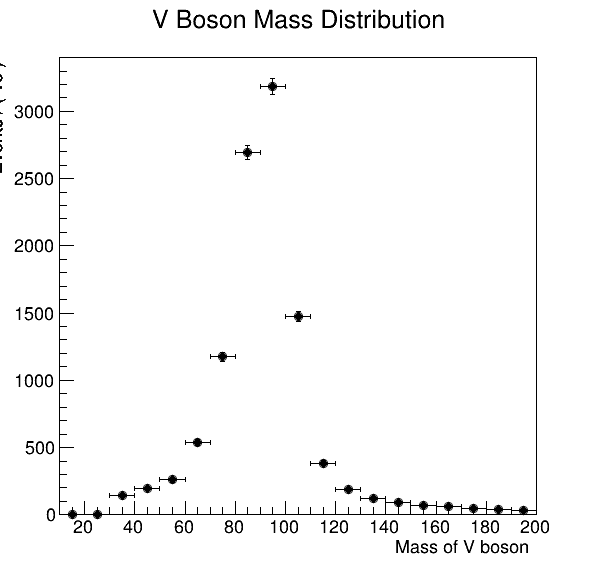

In [17]:
vframe = vmass.frame(ROOT.RooFit.Title("V Boson Mass Distribution"))

ds.plotOn(vframe)

c.Clear()
vframe.Draw()
c.Draw()

Check out the long list of built-in PDFs, among the more widely used ones:

|Background Shapes|RooFit Class|
|:-----|:-----:|
|ARGUS| RooArgusBG|
|Breit-Wigner| RooBreitWigner|
|Bukin| RooBukinPdf|
|Crystal Ball| RooCBShape|
|Polynomials| RooPolynomial|
|Chebychev polynomials | RooChebychev|
|Exponential| RooExponential|
|Gaussian| RooGaussian|
|Landau| RooLandau|

It is also possible to construct a PDF of your own using the **RooGenericPdf** class:

```
func = "1-x+2*y"
genpdf = ROOT.RooGenericPdf(name, title, func, ROOT.RooArgList(x, y))
```


**Exercise: Use either a Crystal Ball function (RooCBShape) or a Bukin function (RooBukinPdf) or any other function you think is suitable, and fit it to the dataset on the V boson mass distribution.**

## RooAddPdf: Composite PDF Models

Real world samples are not as simple or clean as mathematical models tend to be, whereby they may include multiple processes or contributions. In particle physics, signal events and background events may have distribution shapes of their own, so a fit needs a PDF composite of both.

For this, we use the **RooAddPdf** class.

```
comp = ROOT.RooAddPdf(name, title, pdfList, coefList)
```

The PDF and coefficient lists need to use the **RooArgList** class to hold the member. The PDF added need not be a standalone PDF, but also RooAddPdf objects as well.

In [18]:
xvar = ROOT.RooRealVar("xvar", "x", 0, 100)

# background pdf model
const = ROOT.RooRealVar("const", "const", -0.5, -2, 2)
exp = ROOT.RooExponential("exp", "exp", x, const)

# first signal pdf model
mean1  = ROOT.RooRealVar("mean1", "mean1", 40, 20, 60)
sigma1 = ROOT.RooRealVar("sigma1", "sigma1", 5, 3, 7)
gaus1  = ROOT.RooGaussian("gaus1", "gaus1", xvar, mean1, sigma1)

# second signal pdf model
mean2  = ROOT.RooRealVar("mean2", "mean2", 45, 20, 60)
sigma2 = ROOT.RooRealVar("sigma2", "sigma2", 7, 3, 10)
gaus2  = ROOT.RooGaussian("gaus2", "gaus2", xvar, mean2, sigma2)

# composite signal pdf model
fsig1  = ROOT.RooRealVar("fsig1", "sig1 coefficient", 0.5, 0, 1.0)
fsig2  = ROOT.RooRealVar("fsig2", "sig2 coefficient", 0.5, 0, 1.0)
signal = ROOT.RooAddPdf("signal", "signal", ROOT.RooArgList(gaus1, gaus2), ROOT.RooArgList(fsig1, fsig2))

# background pdf model
const = ROOT.RooRealVar("const", "const", -0.05, -10, 2)
exp   = ROOT.RooExponential("exp", "exp", xvar, const)

# composite signal & background pdf model
fsig = ROOT.RooRealVar("fsig", "sig coefficient", 0.4, 0, 1.0)
fbkg = ROOT.RooRealVar("fbkg", "bkg coefficient", 0.6, 0, 1.0)
totalpdf = ROOT.RooAddPdf("totalpdf", "total pdf", ROOT.RooArgList(signal, exp), ROOT.RooArgList(fsig, fbkg))

We built 2 gaussian models and added them together as a single signal model, and later compiled the background to it as well.

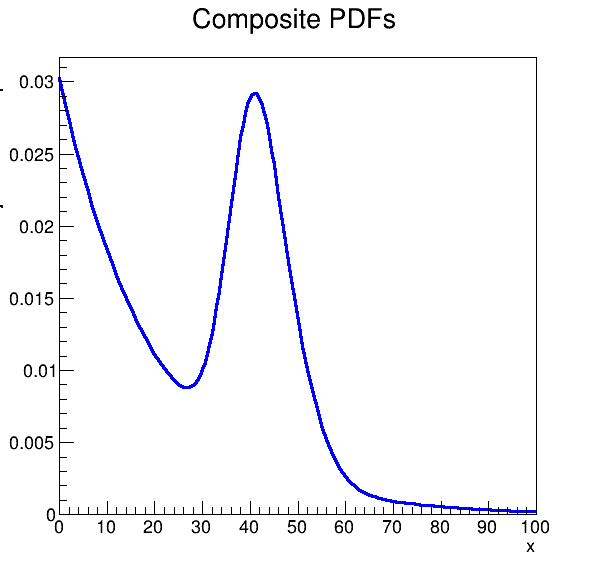

In [19]:
xframe = xvar.frame(ROOT.RooFit.Title("Composite PDFs"))

c.Clear()
totalpdf.plotOn(xframe)
xframe.Draw()
c.Draw()

### Plotting Composite Models

Even with composite models, it is useful to visualize the components of the composide PDF.

[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalpdf) directly selected PDF components: (gaus1,exp)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalpdf) indirectly selected PDF components: (signal)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalpdf) directly selected PDF components: (exp)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalpdf) indirectly selected PDF components: ()


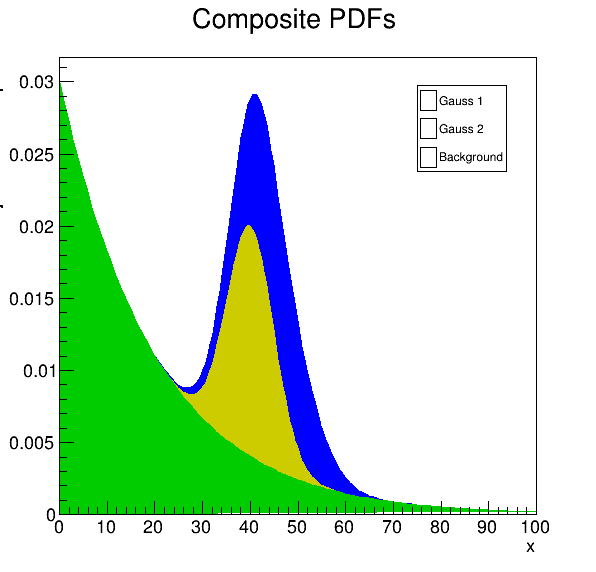

In [20]:
xframe = xvar.frame(ROOT.RooFit.Title("Composite PDFs"))

# plot the first layer, by plotting the whole composite
totalpdf.plotOn(xframe, ROOT.RooFit.LineColor(ROOT.kBlue), \
                ROOT.RooFit.FillColor(ROOT.kBlue), ROOT.RooFit.FillStyle(1001), \
                ROOT.RooFit.DrawOption("F"), ROOT.RooFit.Name("gaus1"))

# declare RooArgSet to select component pdfs
ras_exp_gaus2 = ROOT.RooArgSet(exp, gaus1)

# plot the second layer, by plotting components of the composite
totalpdf.plotOn(xframe, ROOT.RooFit.Components(ras_exp_gaus2), ROOT.RooFit.LineColor(ROOT.kYellow+1), \
                ROOT.RooFit.FillColor(ROOT.kYellow+1), ROOT.RooFit.FillStyle(1001), \
                ROOT.RooFit.DrawOption("F"), ROOT.RooFit.Name("gaus2"))

# plot the final layer, by plotting the remaining component
totalpdf.plotOn(xframe, ROOT.RooFit.Components("exp"),       ROOT.RooFit.LineColor(ROOT.kGreen+1), \
                ROOT.RooFit.FillColor(ROOT.kGreen+1),    ROOT.RooFit.FillStyle(1001), \
                ROOT.RooFit.DrawOption("F"), ROOT.RooFit.Name("bkgd"))

# build legend
lgd = ROOT.TLegend(0.7, 0.7, 0.85, 0.85)
lgd.AddEntry("gaus1", "Gauss 1", "F")
lgd.AddEntry("gaus2", "Gauss 2", "F")
lgd.AddEntry("bkgd", "Background", "F")

c.Clear()
xframe.Draw()
lgd.Draw()
c.Draw()


## Note: Interpretation of of Coefficients and Ranges

Generally, a composite pdf is understood as below: 

<center>$$C(x)=\sum_{N-1}^{i=1}f_1F_1(x)+(1-\sum_{N-1}^{i=1}f_i)F_N(x)$$<center>
    
But the range of the underlying variable will influence how the coefficients are calculated:

In [48]:
# declare the underlying variable
xvar = ROOT.RooRealVar("x", "x", -40, 40)

# declare a composite pdf
m = ROOT.RooRealVar("m", "m", 0, -20, 20)
s = ROOT.RooRealVar("s", "s", 5, 3, 7)
gaus  = ROOT.RooGaussian("gaus", "gaus", xvar, m, s)

genpdf = ROOT.RooGenericPdf("genpdf", "generic pdf", "2*x+80", ROOT.RooArgList(x)) 

f1  = ROOT.RooRealVar("f1", "coef 1", 0.7, 0, 1.0)
f2  = ROOT.RooRealVar("f2", "coef 2", 0.3, 0, 1.0)
comp = ROOT.RooAddPdf("comppdf", "composite pdf", ROOT.RooArgList(gaus, genpdf), ROOT.RooArgList(f1, f2))

If a specific range is not specified, then the composite PDF will interpret the coefficients within the range originally declared, which in this case is [-40, 40].

[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(comppdf) directly selected PDF components: (genpdf)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(comppdf) indirectly selected PDF components: ()
[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'plotRange' created with bounds [-20,20]
[#1] INFO:NumericIntegration -- RooRealIntegral::init(comppdf_Int[x|plotRange]_Norm[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(comppdf) only plotting range [-20,20], curve is normalized to data in given range
[#1] INFO:Plotting -- RooAbsPdf::plotOn(comppdf) directly se

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


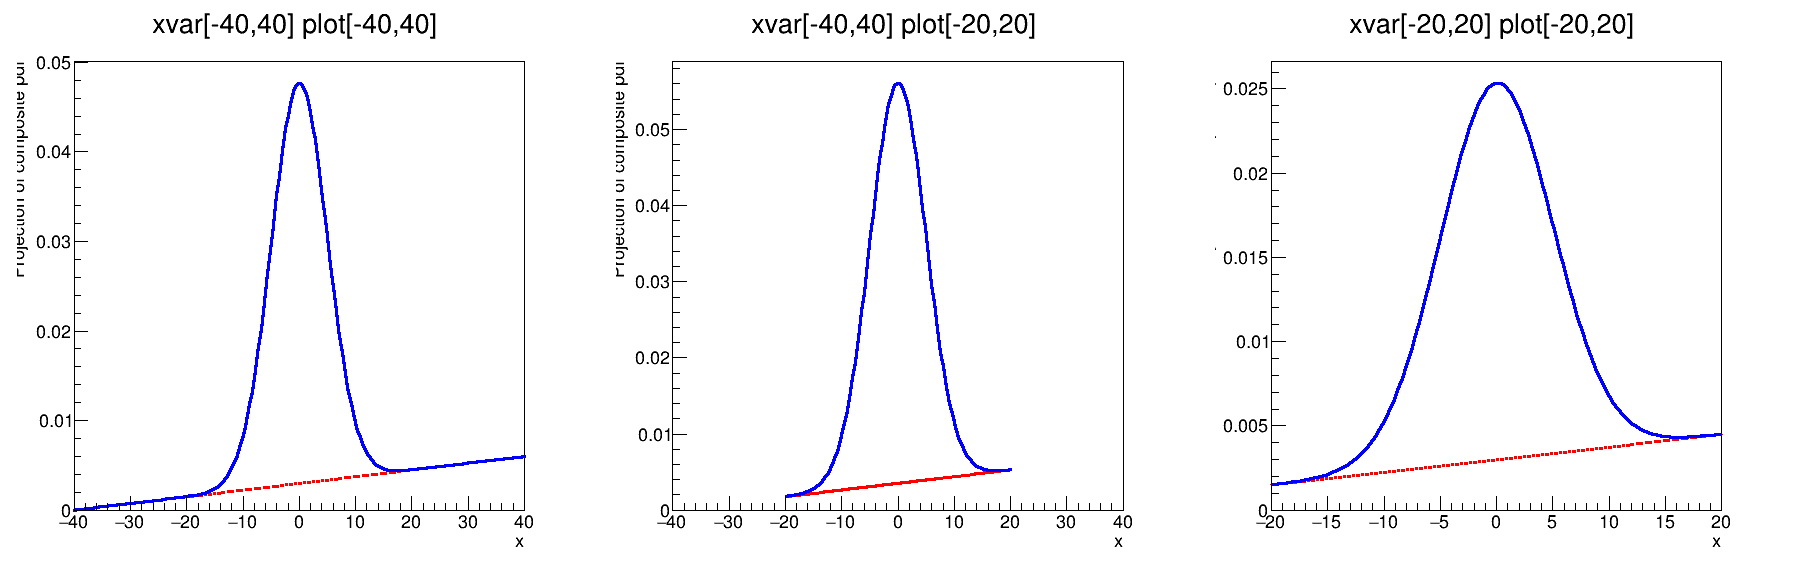

In [49]:
c = ROOT.TCanvas("c", "c", 1800, 600)
c.Divide(3,1)

# plot with the pre-declared range values
frame1 = xvar.frame(ROOT.RooFit.Title("xvar[-40,40] plot[-40,40]"))

c.cd(1)
comp.plotOn(frame1)
comp.plotOn(frame1, ROOT.RooFit.Components("genpdf"), ROOT.RooFit.LineStyle(ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed), ROOT.RooFit.MoveToBack())
frame1.Draw()

# plot within a specified range only
frame2 = xvar.frame(ROOT.RooFit.Title("xvar[-40,40] plot[-20,20]"))

c.cd(2)
comp.plotOn(frame2, ROOT.RooFit.Range(-20, 20))
comp.plotOn(frame2, ROOT.RooFit.Range(-20, 20), ROOT.RooFit.Components("genpdf"), ROOT.RooFit.LineStyle(ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed), ROOT.RooFit.MoveToBack())
frame2.Draw()

# change the declared values
xvar.setRange(-20, 20)
frame3 = xvar.frame(ROOT.RooFit.Title("xvar[-20,20] plot[-20,20]"))

c.cd(3)
comp.plotOn(frame3)
comp.plotOn(frame3, ROOT.RooFit.Components("genpdf"), ROOT.RooFit.LineStyle(ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed), ROOT.RooFit.MoveToBack())
frame3.Draw()

c.Draw()

Now, if were to plot in a specific range but use the same range for the underlying variable, RooFit will automatically create a temporary range on the fly called `plotRange` with the newly specified range. 

As you can see, the newly plotted PDF has a peak that exceeds 0.05. Hence, be careful when you want to specify a range for plotting. Another way this can be affected is by changing the range for the underlying variable.

Of course, you can set a static interpretation range to be used. With the `fixCoefRange()` method, the shape of the model follows the reference range, no matter what the actual range of the variable is actually.

[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x|ref]_Norm[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(comppdf) directly selected PDF components: (genpdf)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(comppdf) indirectly selected PDF components: ()
[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x|ref]_Norm[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Numeri

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


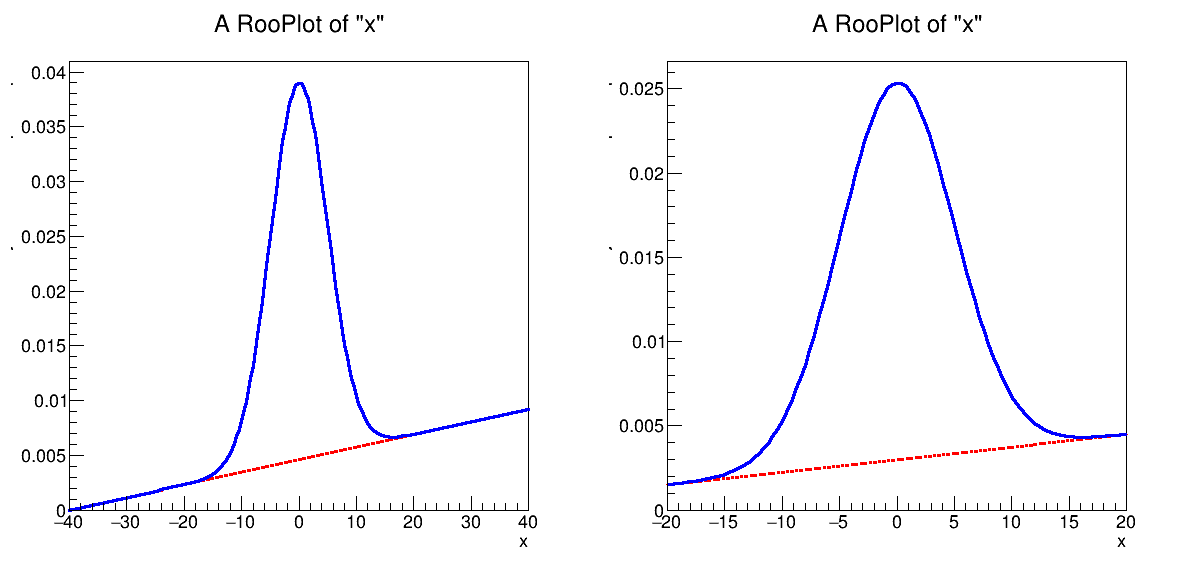

In [46]:
# reset the range
xvar.setRange(-40,40)

# define a reference range
xvar.setRange("ref", -20, 20)

# fix the composite model to the reference range
comp.fixCoefRange("ref")

c = ROOT.TCanvas("c", "c", 1200, 600)
c.Divide(2,1)

frame = xvar.frame()

c.cd(1)
comp.plotOn(frame)
comp.plotOn(frame, ROOT.RooFit.Components("genpdf"), ROOT.RooFit.LineStyle(ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed), ROOT.RooFit.MoveToBack())
frame.Draw()

xvar.setRange(-20,20)

frame1 = xvar.frame()
c.cd(2)
comp.plotOn(frame1)
comp.plotOn(frame1, ROOT.RooFit.Components("genpdf"), ROOT.RooFit.LineStyle(ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed), ROOT.RooFit.MoveToBack())
frame1.Draw()

c.Draw()